In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
company=pd.read_csv("Company_Data.csv")

In [6]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')
company.dtypes
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [9]:
company['ShelveLoc']=company['ShelveLoc'].cat.codes
company['Urban']=company['Urban'].cat.codes
company['US']=company['US'].cat.codes
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


In [13]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']

In [31]:
x = company[feature_cols]
y = company.High
print(x)


     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [30]:
print(y)

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64


In [15]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

In [24]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) 
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0)


In [25]:
dcmodel

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                   random_state=0)

In [ ]:
dcmodel = dcmodel.fit(x_train,y_train) 
y_predict = dcmodel.predict(x_test)

In [45]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  75.0


In [26]:
dcmodel = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
dcmodel.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
from sklearn import tree

[Text(167.4, 190.26, 'X[4] <= 92.5\nentropy = 0.969\nsamples = 320\nvalue = [193, 127]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\nentropy = 0.696\nsamples = 48\nvalue = [9, 39]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 57.0\nentropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 56.5\nentropy = 0.422\nsamples = 35\nvalue = [3, 32]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.75\nsamples = 14\nvalue = [3, 11]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.5\nentropy = 0.908\nsamples = 272\nvalue = [184, 88]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 102.5\nentropy = 0.27\nsamples = 65\nvalue = [62, 3]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.127\nsamples = 57\n

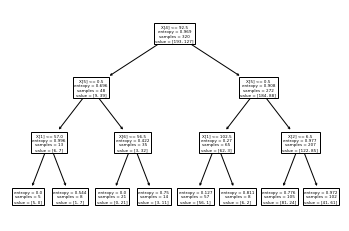

In [29]:
tree.plot_tree(dcmodel)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

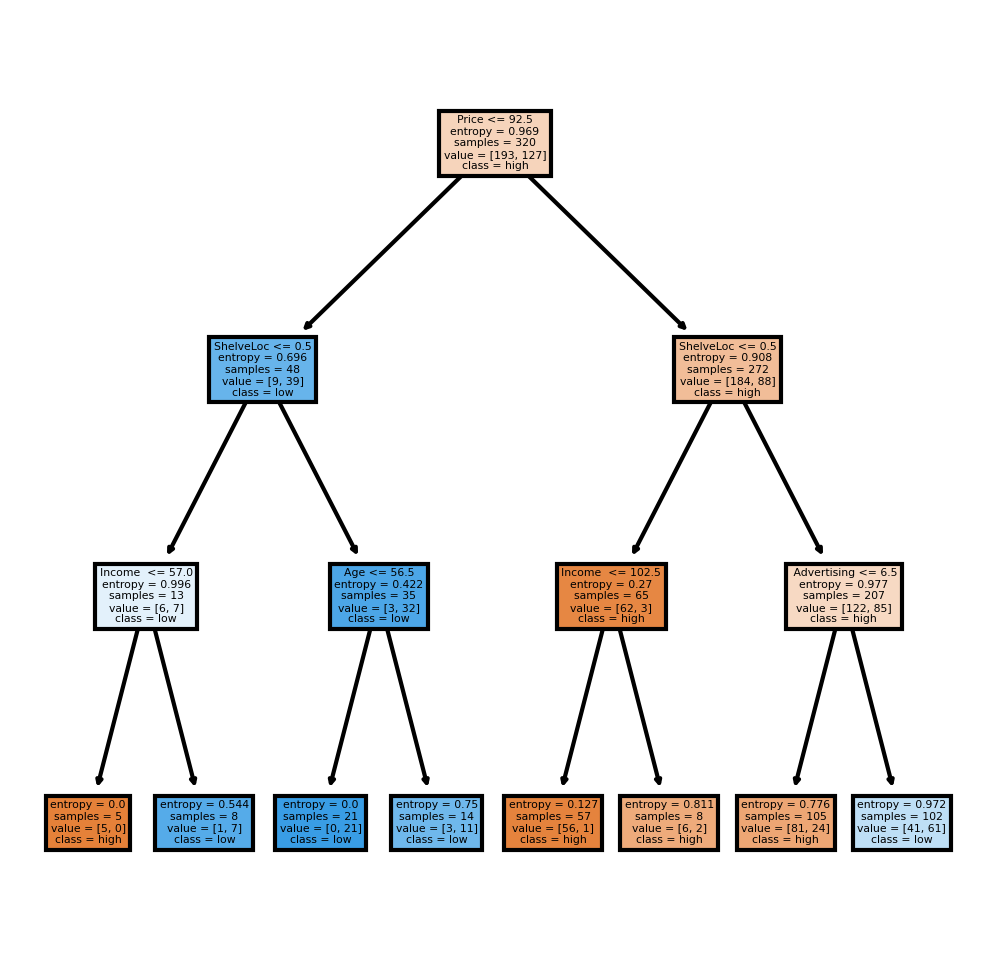

In [42]:
fn=['CompPrice ','Income ',' Advertising','Population ','Price','ShelveLoc','Age']
cn=['high','low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dcmodel,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [43]:
preds = dcmodel.predict(x_test) 
pd.Series(preds).value_counts()

0    45
1    35
dtype: int64

In [44]:
preds 

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [46]:
pd.crosstab(y_test,preds)

col_0,0,1
High,,
0,33,10
1,12,25


In [47]:
np.mean(preds==y_test)

0.725

In [19]:
print(confusion_matrix(y_test,y_predict))

[[36  7]
 [13 24]]


In [20]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.73      0.84      0.78        43
           1       0.77      0.65      0.71        37

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.74        80
weighted avg       0.75      0.75      0.75        80

